In [63]:
#import all necessary packages
import matplotlib.pyplot as plt
from astropy.nddata import CCDData
from astropy.io import fits
import ccdproc as ccdp
from ccdproc import Combiner
from astropy.visualization import hist
import numpy as np
import sys
from scipy import stats as st
#np.set_printoptions(threshold=sys.maxsize)

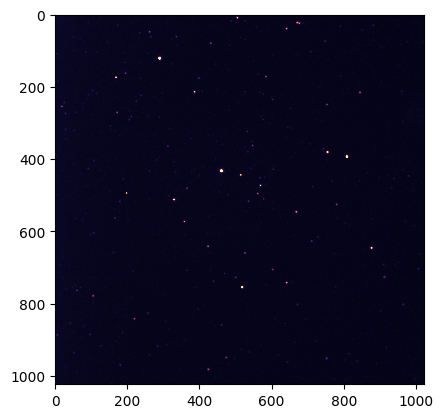

In [74]:
#2 tutorial
#read in the image file
science_image = CCDData.read('science_1.fits', unit='adu')
plt.imshow(science_image.data, cmap = 'inferno', vmin = 150, vmax = 1000)
science_image_data = science_image.data.flatten()

In [46]:
# 3 tutorial - print the header of the science image and determine the exposure time
hdul = fits.open('science_1.fits')
hdr = hdul[0].header
print(hdr)

SIMPLE  =                    T/CCDSOFT-SOFTWARE BISQUE 3                        BITPIX  =                   16                                                  NAXIS   =                    2                                                  NAXIS1  =                 1024                                                  NAXIS2  =                 1024                                                  BSCALE  = +1.000000000000E+000                                                  BZERO   = +3.276800000000E+004                                                  BIAS    =                  100                                                  FOCALLEN= +3.556000000000E+003                                                  APTAREA = +0.000000000000E+000                                                  APTDIA  = +3.560000000000E+002                                                  TELESCOP= 'Meade LX200         '                                                OBSERVER= 'Aaron_Alec_Evan     '        

# 3 tutorial -  exposure time for science_1 image is 2 seconds
# 3 tutorial -  exposure time for all dark frames is 2 seconds
we use all of the dark frames because they have the same exposure time and the temperature difference is within 1 degree

In [48]:
# 4 tutorial
#read in dark frames
darks01 = CCDData.read('darks.00002604.DARK.FIT', unit='adu')
darks01_data = darks01.data.flatten()
darks02 = CCDData.read('darks.00002605.DARK.FIT', unit='adu')
darks02_data = darks02.data.flatten()
darks03 = CCDData.read('darks.00002606.DARK.FIT', unit='adu')
darks03_data = darks03.data.flatten()
darks04 = CCDData.read('darks.00002607.DARK.FIT', unit='adu')
darks04_data = darks04.data.flatten()
darks05 = CCDData.read('darks.00002608.DARK.FIT', unit='adu')
darks05_data = darks05.data.flatten()
darks06 = CCDData.read('darks.00002609.DARK.FIT', unit='adu')
darks06_data = darks06.data.flatten()
darks07 = CCDData.read('darks.00002610.DARK.FIT', unit='adu')
darks07_data = darks07.data.flatten()
darks08 = CCDData.read('darks.00002611.DARK.FIT', unit='adu')
darks08_data = darks08.data.flatten()
darks09 = CCDData.read('darks.00002612.DARK.FIT', unit='adu')
darks09_data = darks09.data.flatten()
darks10 = CCDData.read('darks.00002613.DARK.FIT', unit='adu')
darks10_data = darks10.data.flatten()
darks11 = CCDData.read('darks.00002614.DARK.FIT', unit='adu')
darks11_data = darks11.data.flatten()
darks12 = CCDData.read('darks.00002615.DARK.FIT', unit='adu')
darks12_data = darks12.data.flatten()
darks13 = CCDData.read('darks.00002616.DARK.FIT', unit='adu')
darks13_data = darks13.data.flatten()
darks14 = CCDData.read('darks.00002617.DARK.FIT', unit='adu')
darks14_data = darks14.data.flatten()
darks15 = CCDData.read('darks.00002618.DARK.FIT', unit='adu')
darks15_data = darks15.data.flatten()
darks16 = CCDData.read('darks.00002619.DARK.FIT', unit='adu')
darks16_data = darks16.data.flatten()
darks17 = CCDData.read('darks.00002620.DARK.FIT', unit='adu')
darks17_data = darks17.data.flatten()
darks18 = CCDData.read('darks.00002621.DARK.FIT', unit='adu')
darks18_data = darks18.data.flatten()
darks19 = CCDData.read('darks.00002622.DARK.FIT', unit='adu')
darks19_data = darks19.data.flatten()
darks20 = CCDData.read('darks.00002623.DARK.FIT', unit='adu')
darks20_data = darks20.data.flatten()

#make a median combine of the dark frames
combined = Combiner([darks01, darks02, darks03, darks04, darks05, darks06, darks07, darks08, darks09, darks10, darks11, darks12, darks13,
                    darks14, darks15, darks16, darks17, darks18, darks19, darks20])

In [49]:
#create an array of the combined image
combined_darks = np.array(combined.median_combine())

In [50]:
#Making new FIT file from median array
hdu = fits.PrimaryHDU(combined_darks)
hdul = fits.HDUList([hdu])
#hdu.writeto('master_dark_frames.DARK.FIT')

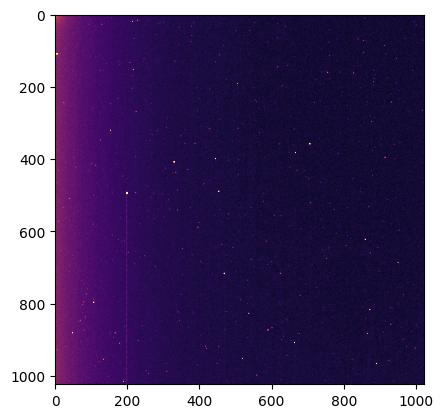

In [79]:
#Master Dark Frame
dark_image = CCDData.read('master_dark_frames.DARK.FIT', unit='adu')
plt.imshow(dark_image.data, cmap = 'inferno', vmin = 100, vmax = 150)
dark_image_data = dark_image.data.flatten()

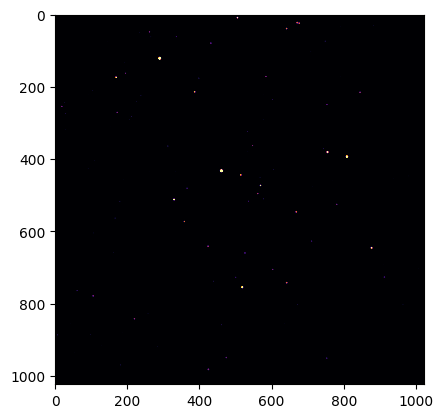

In [80]:
# 4 tutorial - subtract the master dark from the chosen science image
sci_sub_darks = science_image.data - dark_image.data
plt.imshow(sci_sub_darks.data, cmap = 'inferno', vmin = 150, vmax = 1000)

In [53]:
# save the calibrated science field to a file
hdu_darks = fits.PrimaryHDU(sci_sub_darks)
hdul_darks = fits.HDUList([hdu_sci])
#hdu_darks.writeto('darks_science_1_HW4.FIT')

In [54]:
# 5 tutorial
#read in flat fields
flat01 = CCDData.read('flats.00002625.FIT', unit='adu')
flat01_data = flat01.data.flatten()
flat02 = CCDData.read('flats.00002626.FIT', unit='adu')
flat02_data = flat02.data.flatten()
flat03 = CCDData.read('flats.00002627.FIT', unit='adu')
flat03_data = flat03.data.flatten()
flat04 = CCDData.read('flats.00002628.FIT', unit='adu')
flat04_data = flat04.data.flatten()
flat05 = CCDData.read('flats.00002629.FIT', unit='adu')
flat05_data = flat05.data.flatten()
flat06 = CCDData.read('flats.00002630.FIT', unit='adu')
flat06_data = flat06.data.flatten()
flat07 = CCDData.read('flats.00002631.FIT', unit='adu')
flat07_data = flat07.data.flatten()
flat08 = CCDData.read('flats.00002632.FIT', unit='adu')
flat08_data = flat08.data.flatten()
flat09 = CCDData.read('flats.00002633.FIT', unit='adu')
flat09_data = flat09.data.flatten()
flat010 = CCDData.read('flats.00002634.FIT', unit='adu')
flat010_data = flat010.data.flatten()

In [55]:
# 5a tutorial - find the mean for all flat fields
mean_flats = np.array([])
for i in range(2625,2635):
    flats = np.array(CCDData.read(f'flats.0000{i}.FIT', unit='adu'))
    mean_flats = np.append(mean_flats, np.mean(flats))
print(mean_flats)

[32406.19105434 32243.78715706 32223.98652554 32330.51386738
 32345.54039097 32337.68927193 32371.46247005 32333.61527348
 32273.85892105 32194.7219944 ]


In [56]:
# 5b tutorial - take the median combine of all the flat fields
combiner_ff = Combiner([flat01, flat02, flat03, flat04, flat05, flat06, flat07, flat08, flat09, flat010])
combined_median_flats = np.array(combiner_ff.median_combine())

vals, counts = np.unique(combined_median_flats, return_counts=True)

# 5c tutorial - find the mode of the master flat field
mode_value = np.argwhere(counts == np.max(counts))

mode_flats = vals[mode_value].flatten().tolist()

#print list of modes
print(vals[mode_value].flatten().tolist())

# define the normed flat field
normed_flat = combined_median_flats/mode_flats

[32847.0]


In [57]:
# save the normed master flat field to a file
hdu_flats = fits.PrimaryHDU(normed_flat)
hdul_flats = fits.HDUList([hdu_flats])
#hdu_flats.writeto('normed_master_flat_HW4.FIT')

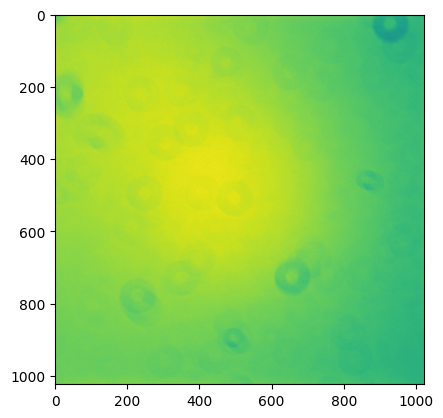

In [58]:
#Master Flat Field
flat_image = CCDData.read('normed_master_flat_HW4.FIT', unit='adu')
plt.imshow(flat_image.data)

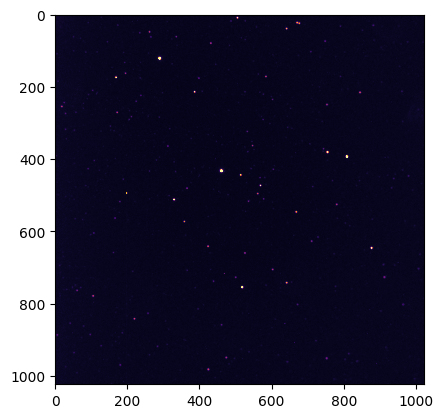

In [81]:
# 6 tutorial - DIVIDE SCIENCE IMAGE BY NORMED MASTER FLAT
sci_div_flats = science_image.data/flat_image.data
plt.imshow(sci_div_flats.data, cmap = 'inferno', vmin = 150, vmax = 1000)

In [61]:
# save the calibrated science field to a file
hdu_sci = fits.PrimaryHDU(sci_div_flats)
hdul_sci = fits.HDUList([hdu_sci])
#hdu_sci.writeto('flats_science_1_HW4.FIT')

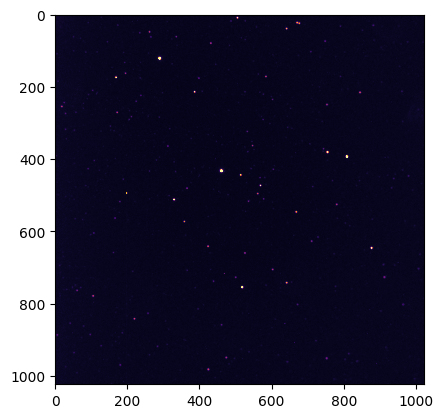

In [82]:
plt.imshow(science_image.data, cmap = 'inferno', vmin = 150, vmax = 1000)
plt.imshow(sci_sub_darks.data, cmap = 'inferno', vmin = 150, vmax = 1000)
plt.imshow(sci_div_flats.data, cmap = 'inferno', vmin = 150, vmax = 1000)